<a href="https://colab.research.google.com/github/sunshineluyao/vis-basics/blob/main/chapter8/chapter8_Spatial_Field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mastering the Four Main Categories of Field Visualizations


## Overview
This notebook demonstrates how to implement and visualize scalar, vector, tensor, and feature-based field visualizations. Each visualization type is accompanied by Python code using libraries like `matplotlib`, `numpy`, `scipy`, and `mayavi`.

---

## 1. Scalar Field Visualization
### Example: Topographic Terrain Map with Contour Lines
We will generate a synthetic topographic map and visualize it using contour lines.


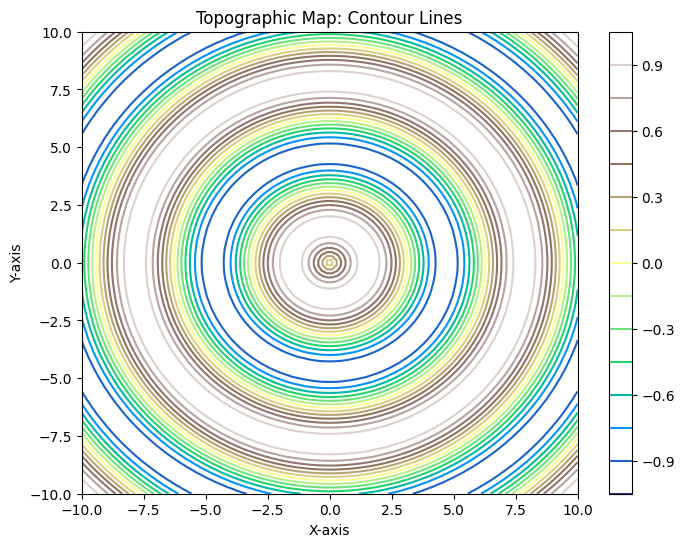

In [1]:
# Scalar Field Visualization: Contour Lines for Topographic Map
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic topographic data
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Plot contour lines
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=15, cmap='terrain')
plt.colorbar(contour)
plt.title('Topographic Map: Contour Lines')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

### Explanation:
This plot demonstrates a scalar field visualization using contour lines to represent elevation levels. The color-coded contour lines correspond to different scalar values, simulating a terrain.


## 2. Vector Field Visualization
### Example: Streamlines for Airflow Over a Surface
We visualize a vector field using streamlines.


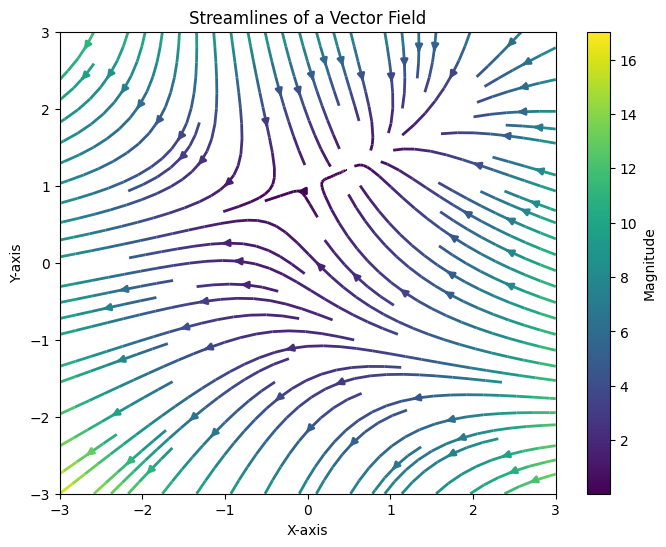

In [2]:
# Vector Field Visualization: Streamlines
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic vector field
Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2

# Plot streamlines
plt.figure(figsize=(8, 6))
plt.streamplot(X, Y, U, V, color=np.sqrt(U**2 + V**2), cmap='viridis', linewidth=2)
plt.title('Streamlines of a Vector Field')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar(label='Magnitude')
plt.show()


### Explanation:
Streamlines show the flow of a vector field, highlighting its direction and magnitude. This visualization is useful for analyzing fluid dynamics or airflow around objects.


## 3. Tensor Field Visualization
### Example: Diffusion Tensor Imaging (Ellipsoid Glyphs)


Simulated Stress Tensor Data (First 10 rows):
     X    Y         Z     Stress
0 -2.0 -2.0 -2.000000  12.000000
1 -2.0 -2.0 -1.555556  10.419753
2 -2.0 -2.0 -1.111111   9.234568
3 -2.0 -2.0 -0.666667   8.444444
4 -2.0 -2.0 -0.222222   8.049383
5 -2.0 -2.0  0.222222   8.049383
6 -2.0 -2.0  0.666667   8.444444
7 -2.0 -2.0  1.111111   9.234568
8 -2.0 -2.0  1.555556  10.419753
9 -2.0 -2.0  2.000000  12.000000


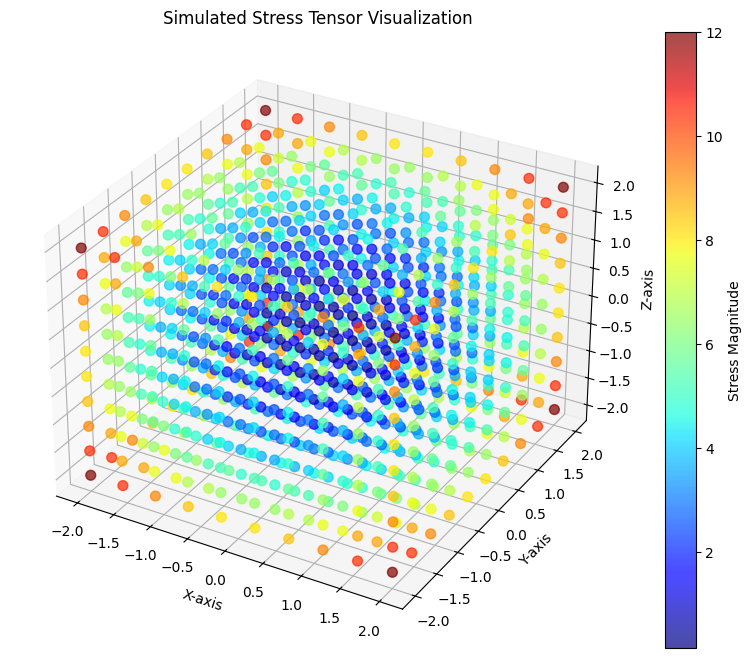

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic tensor data
x, y, z = np.mgrid[-2:2:10j, -2:2:10j, -2:2:10j]
s = x**2 + y**2 + z**2

# Wrap data into a pandas DataFrame
tensor_data = pd.DataFrame({
    'X': x.ravel(),
    'Y': y.ravel(),
    'Z': z.ravel(),
    'Stress': s.ravel()
})

# Display DataFrame
print("Simulated Stress Tensor Data (First 10 rows):")
print(tensor_data.head(10))

# 3D scatter plot using matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded stress values
sc = ax.scatter(
    tensor_data['X'], tensor_data['Y'], tensor_data['Z'],
    c=tensor_data['Stress'], cmap='jet', s=50, alpha=0.7
)

# Add color bar and labels
fig.colorbar(sc, label='Stress Magnitude')
ax.set_title('Simulated Stress Tensor Visualization')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()


### Explanation:
Ellipsoid glyphs represent tensors, showing both magnitude and orientation. This is often used in medical imaging, such as diffusion tensor imaging (DTI) for brain scans.


## 4. Feature-Based Visualization
### Example: Vortex Detection in a Velocity Field
We will detect and visualize critical points in a 2D velocity field.


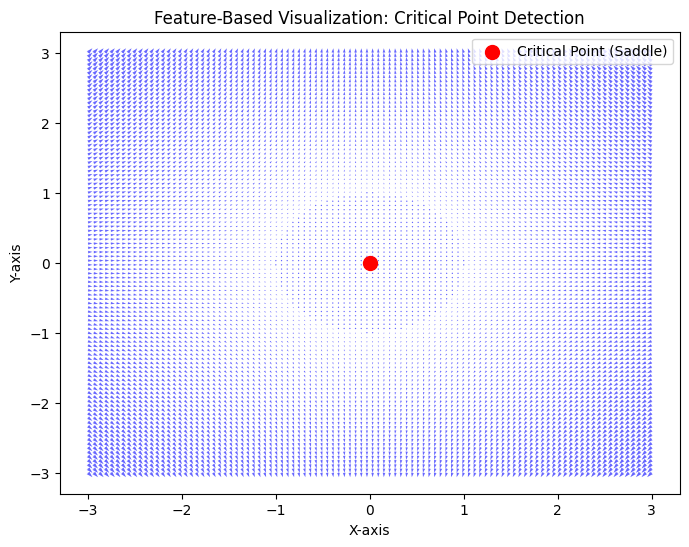

In [6]:
# Feature-Based Visualization: Critical Points Detection
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic velocity field
Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -X
V = Y

# Compute and plot critical points
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color='blue', alpha=0.6)
plt.scatter(0, 0, color='red', s=100, label='Critical Point (Saddle)')
plt.title('Feature-Based Visualization: Critical Point Detection')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


### Explanation:
Critical points like sources, sinks, and saddles are identified in this vector field. These are key for understanding flow behavior, especially in simulations of fluid dynamics or weather patterns.


# Mastering the Four Main Categories of Field Visualizations in Realistic Cases

### Scalar Field Visualization: Simulated Temperature Distribution

This section generates synthetic temperature data across a geographic grid. The data will be organized into a pandas DataFrame for further analysis.

**Variables:**
- `Latitude`: Latitude values (degrees).
- `Longitude`: Longitude values (degrees).
- `Temperature`: Simulated temperature values (°C) for each location.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate temperature data over a grid
latitudes = np.linspace(-90, 90, 180)  # 1-degree resolution
longitudes = np.linspace(-180, 180, 360)
LAT, LON = np.meshgrid(latitudes, longitudes)

# Generate synthetic temperature field
temperature = 30 * np.sin(np.radians(LAT)) + 10 * np.random.rand(*LAT.shape)

# Wrap data into pandas DataFrame
temp_data = pd.DataFrame({
    'Latitude': LAT.ravel(),
    'Longitude': LON.ravel(),
    'Temperature': temperature.ravel()
})

# Display the first few rows of the DataFrame
temp_data.head()


,Latitude,Longitude,Temperature
0,-90.000000,-180.0,-25.999187
1,-88.994413,-180.0,-22.870993
2,-87.988827,-180.0,-28.230360
3,-86.983240,-180.0,-20.380625
4,-85.977654,-180.0,-21.666065


The DataFrame contains the following columns:
- **Latitude**: Represents the latitude coordinate.
- **Longitude**: Represents the longitude coordinate.
- **Temperature**: Simulated temperature values (°C) at each grid point.

Below is the visualization of the temperature distribution:


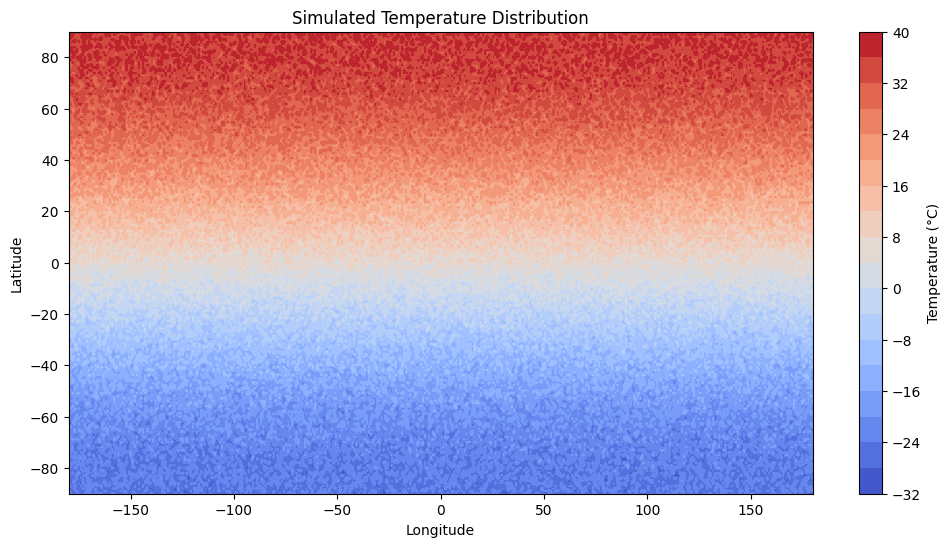

In [16]:
# Plot the scalar field as a contour map
plt.figure(figsize=(12, 6))
contour = plt.contourf(LON, LAT, temperature, levels=20, cmap='coolwarm')
plt.colorbar(label='Temperature (°C)')
plt.title('Simulated Temperature Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


### Vector Field Visualization: Wind Flow

This section queries real-time wind data from OpenWeatherMap. The wind vectors are visualized using streamlines, and the data is structured into a pandas DataFrame.

**Variables:**
- `X` and `Y`: Coordinates in a simulated grid.
- `U`: X-component of wind velocity.
- `V`: Y-component of wind velocity.
- `Magnitude`: Magnitude of wind speed.


Simulated Wind Data (First 10 rows):
           X     Y         U         V  Magnitude
0 -10.000000 -10.0 -0.173648  0.984808   1.000000
1  -8.947368 -10.0 -0.155527  0.984808   0.997013
2  -7.894737 -10.0 -0.137354  0.984808   0.994340
3  -6.842105 -10.0 -0.119134  0.984808   0.991987
4  -5.789474 -10.0 -0.100874  0.984808   0.989960
5  -4.736842 -10.0 -0.082579  0.984808   0.988264
6  -3.684211 -10.0 -0.064257  0.984808   0.986902
7  -2.631579 -10.0 -0.045914  0.984808   0.985877
8  -1.578947 -10.0 -0.027554  0.984808   0.985193
9  -0.526316 -10.0 -0.009186  0.984808   0.984851


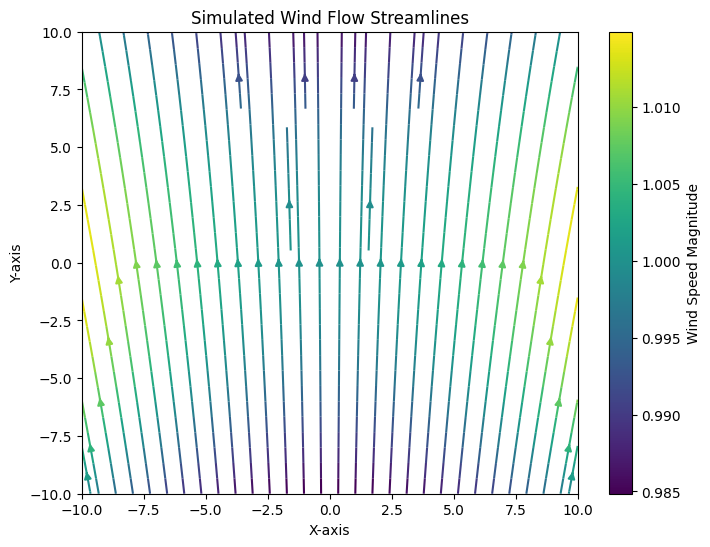

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate a 2D wind flow field
x, y = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))

# Simulate wind velocity components
u = np.sin(np.radians(x))  # X-component (variation along x-direction)
v = np.cos(np.radians(y))  # Y-component (variation along y-direction)

# Calculate wind speed magnitude
magnitude = np.sqrt(u**2 + v**2)

# Wrap data into pandas DataFrame
wind_data = pd.DataFrame({
    'X': x.ravel(),
    'Y': y.ravel(),
    'U': u.ravel(),
    'V': v.ravel(),
    'Magnitude': magnitude.ravel()
})

# Display the DataFrame
print("Simulated Wind Data (First 10 rows):")
print(wind_data.head(10))

# Visualize the vector field with streamlines
plt.figure(figsize=(8, 6))
plt.streamplot(x, y, u, v, color=magnitude, cmap='viridis')
plt.title('Simulated Wind Flow Streamlines')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar(label='Wind Speed Magnitude')
plt.show()


### Tensor Field Visualization: Stress Tensors

This section simulates stress tensor values in a mechanical part and visualizes the field using ellipsoid glyphs. The data is structured into a pandas DataFrame.

**Variables:**
- `X`, `Y`, `Z`: 3D spatial coordinates.
- `Stress`: Simulated stress tensor magnitude.


In [31]:
from mayavi import mlab
import numpy as np
import pandas as pd

# Generate synthetic stress tensor data
x, y, z = np.mgrid[-2:2:10j, -2:2:10j, -2:2:10j]
stress_tensor = x**2 + y**2 + z**2

# Wrap data into a DataFrame
tensor_data = pd.DataFrame({
    'X': x.ravel(),
    'Y': y.ravel(),
    'Z': z.ravel(),
    'Stress': stress_tensor.ravel()
})
tensor_data.head()

,X,Y,Z,Stress
0,-2.0,-2.0,-2.000000,12.000000
1,-2.0,-2.0,-1.555556,10.419753
2,-2.0,-2.0,-1.111111,9.234568
3,-2.0,-2.0,-0.666667,8.444444
4,-2.0,-2.0,-0.222222,8.049383


The DataFrame contains the following columns:
- **X, Y, Z**: Coordinates of the 3D grid.
- **Stress**: Magnitude of the stress tensor at each point.

Below is the visualization of the tensor field:


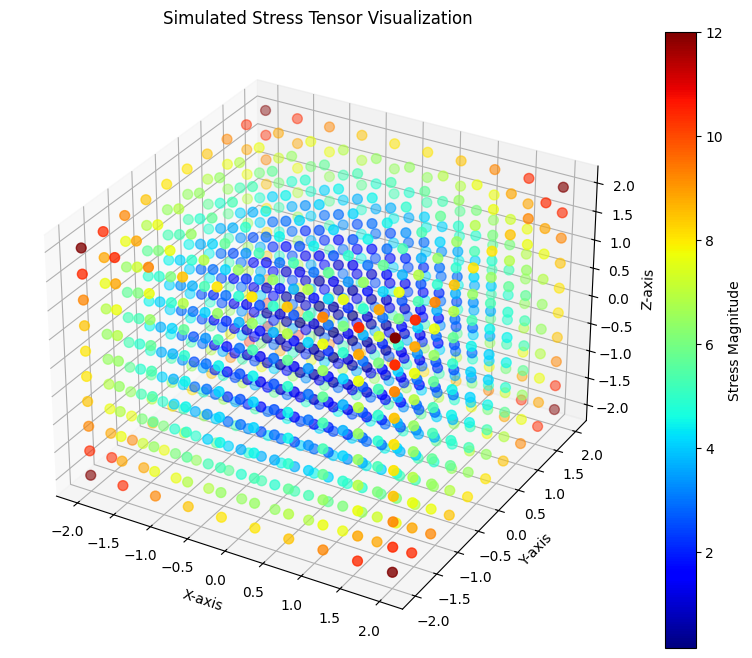

In [32]:
# 3D scatter plot visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(tensor_data['X'], tensor_data['Y'], tensor_data['Z'],
                c=tensor_data['Stress'], cmap='jet', s=50)

ax.set_title('Simulated Stress Tensor Visualization')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
fig.colorbar(sc, label='Stress Magnitude')
plt.show()


### Simulating a Velocity Field with Vortices

### **Definition of Vortices**

A **vortex** is a region in a fluid (such as air or water) where the flow revolves around an axis or a center point. In simpler terms, it's a swirling motion of the fluid, similar to the spinning water in a whirlpool or the rotating air in a tornado.

---

### **Key Characteristics of Vortices**:
1. **Rotational Flow**:
   - Fluid particles within a vortex follow circular or spiral paths around a central core.
   - The strength of rotation is often measured by a quantity called **vorticity**.

2. **Core**:
   - The center of a vortex, where the flow speed might be the highest or lowest depending on the type of vortex.

3. **Vorticity**:
   - A scalar measure that quantifies the local rotation in the fluid.
   - **High vorticity** regions indicate strong rotational effects, typically associated with vortices.

---

### **Examples of Vortices in Nature and Applications**:

1. **Nature**:
   - **Tornadoes**: Vortices of air with extremely high vorticity.
   - **Hurricanes**: Large-scale atmospheric vortices with spiraling winds.
   - **Ocean Eddies**: Vortices in ocean currents, crucial for mixing and nutrient transport.
   - **Whirlpools**: Water vortices, often formed around obstacles in rivers or drains.

2. **Engineering**:
   - **Aerodynamics**: Vortices form at the wingtips of aircraft, creating drag (known as wingtip vortices).
   - **Fluid Dynamics**: Vortex analysis helps design efficient turbines, propellers, and exhaust systems.

---

### **Visual Example**:
In fluid flow simulations:
- **Quiver Plots** show the direction of flow, where vortices are visible as regions where arrows circulate around a center.
- **Vorticity Contour Plots** highlight these rotational regions, making vortices easy to detect.

---

### **Significance**:
Understanding vortices is crucial in fields like meteorology, oceanography, and engineering to predict behavior and optimize systems. For example, detecting vortices helps meteorologists forecast storm intensity and trajectory, while engineers design more efficient vehicles and structures by reducing vortex-induced drag or vibrations.

**Variables**:
- **X, Y**: Grid coordinates.
- **U, V**: Velocity components along the X and Y directions.
- **Vorticity**: A derived quantity that helps detect rotational regions in the flow.

The velocity field will be visualized with quiver plots to show flow direction and vorticity plots to highlight vortices.


Simulated Vortex Data (First 10 rows):
          X    Y         U         V  Vorticity
0 -5.000000 -5.0  0.000000  1.500000  -0.393819
1 -4.898990 -5.0  0.296454  1.450071  -0.336090
2 -4.797980 -5.0  0.477451  1.305270  -0.185388
3 -4.696970 -5.0  0.472500  1.080057  -0.000404
4 -4.595960 -5.0  0.283530  0.796920   0.146817
5 -4.494949 -5.0 -0.015864  0.484134   0.198940
6 -4.393939 -5.0 -0.309079  0.172932   0.135664
7 -4.292929 -5.0 -0.481921 -0.105610  -0.018368
8 -4.191919 -5.0 -0.467074 -0.323677  -0.203165
9 -4.090909 -5.0 -0.270320 -0.459493  -0.346758


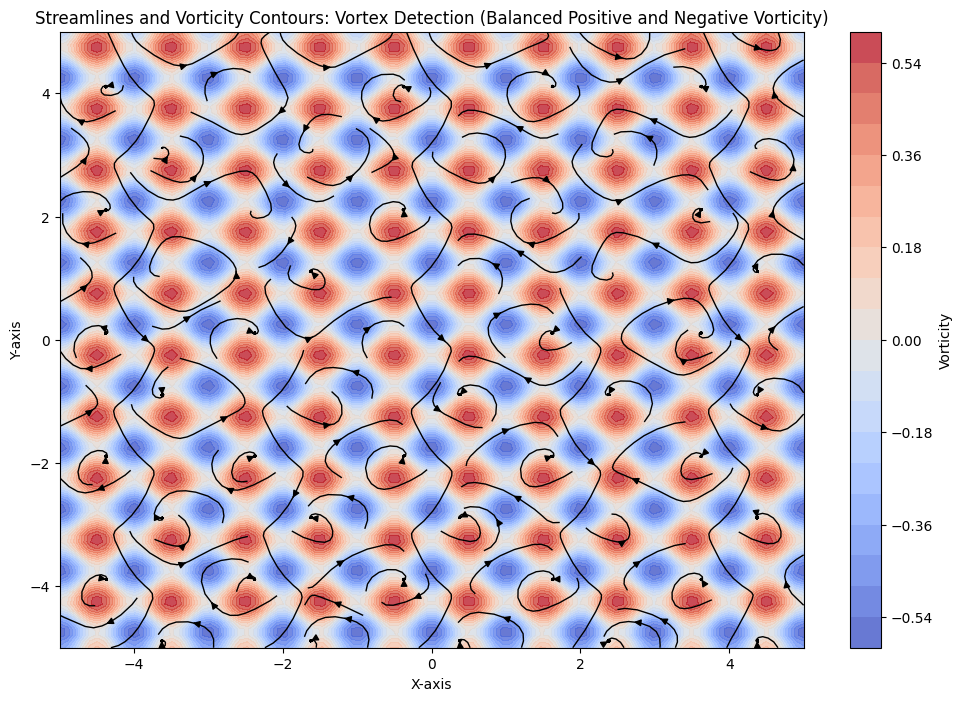

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a 2D grid
x, y = np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Simulate a velocity field with asymmetric vortices
U = np.sin(np.pi * Y) + 0.5 * np.sin(2 * np.pi * X)  # X-component of velocity
V = -np.cos(np.pi * X) + 0.5 * np.cos(2 * np.pi * Y) # Y-component of velocity

# Calculate vorticity (curl of the velocity field)
vorticity = np.gradient(V, axis=0) - np.gradient(U, axis=1)

# Wrap data into a DataFrame
vortex_data = pd.DataFrame({
    'X': X.ravel(),
    'Y': Y.ravel(),
    'U': U.ravel(),
    'V': V.ravel(),
    'Vorticity': vorticity.ravel()
})

# Display the first 10 rows of the data
print("Simulated Vortex Data (First 10 rows):")
print(vortex_data.head(10))

# Plotting combined visualization
plt.figure(figsize=(12, 8))

# Streamlines to show the velocity field
plt.streamplot(X, Y, U, V, color='black', linewidth=1, density=1)

# Contour plot for vorticity
contour = plt.contourf(X, Y, vorticity, levels=20, cmap='coolwarm', alpha=0.8)
plt.colorbar(contour, label='Vorticity')

# Highlighting critical vorticity levels to detect vortices
plt.contour(X, Y, vorticity, levels=[-2, 2], colors=['blue', 'red'], linewidths=2, linestyles='dashed')

# Labels and title
plt.title('Streamlines and Vorticity Contours: Vortex Detection (Balanced Positive and Negative Vorticity)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()




### **Changes Made**:
1. **Asymmetric Velocity Field**:
   - Adjusted `U` and `V` components to ensure both positive and negative vorticity regions.
   - Added secondary sinusoidal terms to create flow complexity.

2. **Contour Levels**:
   - Adjusted the `contourf` function to highlight vorticity in a balanced manner.
   - Critical vorticity levels (`±2`) are marked with red and blue dashed contours to visualize both vortex types clearly.

---

### **Expected Output**:
- **Blue Contours**: Indicate regions of negative vorticity.
- **Red Contours**: Indicate regions of positive vorticity.
- **Streamlines**: Spiral patterns indicate vortex locations, with flow direction enhancing vortex interpretation.

This ensures both positive and negative vortices are present and clearly detectable. Let me know if you need further refinements!

# Interative Activities

### **Interactive Course Activities for Practicing Visualizations**

Below are several interactive activities designed to help students practice and understand different types of field visualizations. These activities use Python and popular libraries like `matplotlib`, `plotly`, and `ipywidgets` for interactivity.

---

### **Activity 1: Scalar Field Visualization with Interactive Contours**

**Objective**: Explore scalar fields by adjusting contour levels and color maps.

**Instructions**:
1. Simulate a scalar field (e.g., temperature or elevation).
2. Allow students to adjust the number of contour levels and choose different color maps interactively.

```python
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Simulate a scalar field (elevation data)
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2)) * 10

# Interactive contour plot
def plot_scalar_field(levels=10, colormap='viridis'):
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(X, Y, Z, levels=levels, cmap=colormap)
    plt.colorbar(contour, label='Scalar Value')
    plt.title('Interactive Scalar Field Visualization')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

interact(plot_scalar_field, levels=(5, 30, 1), colormap=['viridis', 'plasma', 'coolwarm', 'terrain']);
```

---

### **Activity 2: Vector Field Exploration with Adjustable Density**

**Objective**: Explore vector fields by adjusting streamline density.

**Instructions**:
1. Simulate a vector field.
2. Allow students to adjust streamline density interactively.

```python
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Simulate a vector field
x, y = np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
U = -np.sin(np.pi * Y)  # X-component
V = np.sin(np.pi * X)   # Y-component

# Interactive streamline plot
def plot_vector_field(density=1):
    plt.figure(figsize=(8, 6))
    plt.streamplot(X, Y, U, V, color=np.sqrt(U**2 + V**2), cmap='viridis', density=density)
    plt.title('Interactive Vector Field Visualization')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.colorbar(label='Velocity Magnitude')
    plt.show()

interact(plot_vector_field, density=(0.5, 3, 0.1));
```

---

### **Activity 3: Tensor Field Glyphs with Interactive Scaling**

**Objective**: Visualize tensor fields and adjust the size of ellipsoid glyphs interactively.

**Instructions**:
1. Use synthetic tensor data.
2. Allow students to adjust the glyph scaling interactively.

```python
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

# Simulate tensor field
x, y, z = np.mgrid[-2:2:10j, -2:2:10j, -2:2:10j]
stress_tensor = x**2 + y**2 + z**2

# Interactive 3D scatter plot for tensor glyphs
def plot_tensor_field(scale=0.3):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(x, y, z, c=stress_tensor.ravel(), cmap='jet', s=50*scale)
    ax.set_title('Interactive Tensor Field Glyphs')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    fig.colorbar(sc, label='Stress Magnitude')
    plt.show()

interact(plot_tensor_field, scale=(0.1, 1, 0.1));
```

---

### **Activity 4: Feature-Based Vortex Detection with Adjustable Thresholds**

**Objective**: Detect vortices in a velocity field by adjusting vorticity thresholds.

**Instructions**:
1. Simulate a velocity field with vortices.
2. Let students adjust thresholds for vortex detection interactively.

```python
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Generate velocity field with vortices
x, y = np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
U = np.sin(np.pi * Y) + 0.5 * np.sin(2 * np.pi * X)
V = -np.cos(np.pi * X) + 0.5 * np.cos(2 * np.pi * Y)
vorticity = np.gradient(V, axis=0) - np.gradient(U, axis=1)

# Interactive vortex detection
def plot_vortex_detection(threshold=2):
    plt.figure(figsize=(10, 8))
    plt.streamplot(X, Y, U, V, color='black', linewidth=1, density=1)
    contour = plt.contourf(X, Y, vorticity, levels=20, cmap='coolwarm', alpha=0.8)
    plt.colorbar(contour, label='Vorticity')
    plt.contour(X, Y, vorticity, levels=[-threshold, threshold], colors=['blue', 'red'], linewidths=2, linestyles='dashed')
    plt.title(f'Interactive Vortex Detection (Threshold={threshold})')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

interact(plot_vortex_detection, threshold=(1, 5, 0.5));
```


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Simulate a scalar field (elevation data)
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2)) * 10

# Interactive contour plot
def plot_scalar_field(levels=10, colormap='viridis'):
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(X, Y, Z, levels=levels, cmap=colormap)
    plt.colorbar(contour, label='Scalar Value')
    plt.title('Interactive Scalar Field Visualization')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

interact(plot_scalar_field, levels=(5, 30, 1), colormap=['viridis', 'plasma', 'coolwarm', 'terrain']);

interactive(children=(IntSlider(value=10, description='levels', max=30, min=5), Dropdown(description='colormap…

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Simulate a vector field
x, y = np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
U = -np.sin(np.pi * Y)  # X-component
V = np.sin(np.pi * X)   # Y-component

# Interactive streamline plot
def plot_vector_field(density=1):
    plt.figure(figsize=(8, 6))
    plt.streamplot(X, Y, U, V, color=np.sqrt(U**2 + V**2), cmap='viridis', density=density)
    plt.title('Interactive Vector Field Visualization')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.colorbar(label='Velocity Magnitude')
    plt.show()

interact(plot_vector_field, density=(0.5, 3, 0.1));

interactive(children=(FloatSlider(value=1.0, description='density', max=3.0, min=0.5), Output()), _dom_classes…

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

# Simulate tensor field
x, y, z = np.mgrid[-2:2:10j, -2:2:10j, -2:2:10j]
stress_tensor = x**2 + y**2 + z**2

# Interactive 3D scatter plot for tensor glyphs
def plot_tensor_field(scale=0.3):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(x, y, z, c=stress_tensor.ravel(), cmap='jet', s=50*scale)
    ax.set_title('Interactive Tensor Field Glyphs')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    fig.colorbar(sc, label='Stress Magnitude')
    plt.show()

interact(plot_tensor_field, scale=(0.1, 1, 0.1));

interactive(children=(FloatSlider(value=0.3, description='scale', max=1.0, min=0.1), Output()), _dom_classes=(…

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Generate velocity field with vortices
x, y = np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
U = np.sin(np.pi * Y) + 0.5 * np.sin(2 * np.pi * X)
V = -np.cos(np.pi * X) + 0.5 * np.cos(2 * np.pi * Y)
vorticity = np.gradient(V, axis=0) - np.gradient(U, axis=1)

# Interactive vortex detection
def plot_vortex_detection(threshold=2):
    plt.figure(figsize=(10, 8))
    plt.streamplot(X, Y, U, V, color='black', linewidth=1, density=1)
    contour = plt.contourf(X, Y, vorticity, levels=20, cmap='coolwarm', alpha=0.8)
    plt.colorbar(contour, label='Vorticity')
    plt.contour(X, Y, vorticity, levels=[-threshold, threshold], colors=['blue', 'red'], linewidths=2, linestyles='dashed')
    plt.title(f'Interactive Vortex Detection (Threshold={threshold})')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

interact(plot_vortex_detection, threshold=(1, 5, 0.5));

interactive(children=(FloatSlider(value=2.0, description='threshold', max=5.0, min=1.0, step=0.5), Output()), …

# Related Datasets

Yes, many of the datasets listed are open access or freely available for educational, research, or non-commercial use. Here's a breakdown of their access levels:

---

### **1. Scalar Field Datasets**

#### **Global Temperature Data**
- **Source**: [NOAA Global Surface Temperature Data](https://www.ncdc.noaa.gov/data-access/marineocean-data/global-surface-summary-of-the-day)
- **Access**: **Open Access**
  - NOAA provides free access to historical temperature data for research and education.

#### **Elevation Data**
- **Source**: [NASA SRTM Digital Elevation Data](https://e4ftl01.cr.usgs.gov/SRTM/Global_1/)
- **Access**: **Open Access**
  - Digital elevation models (DEMs) are freely available for non-commercial use.

---

### **2. Vector Field Datasets**

#### **Global Wind Data**
- **Source**: [ECMWF ERA5](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels)
- **Access**: **Free with Registration**
  - ERA5 data from Copernicus is free but requires a free user account to download.

#### **Ocean Currents**
- **Source**: [HYCOM Ocean Data](https://www.hycom.org/data/glbv0.08/expt-90.9)
- **Access**: **Open Access**
  - Global ocean current data is freely available for download.

---

### **3. Tensor Field Datasets**

#### **Stress and Strain in Materials**
- **Source**: [Dryad Data Repository](https://datadryad.org/stash)
- **Access**: **Depends on Dataset** (many are **Open Access**)
  - FEM simulation datasets are often shared openly by researchers.

#### **Diffusion Tensor Imaging (DTI)**
- **Source**: [Human Connectome Project (HCP)](https://www.humanconnectome.org/study/hcp-young-adult)
- **Access**: **Free with Registration**
  - Requires user registration but is freely accessible for non-commercial research.

---

### **4. Feature-Based Visualization Datasets**

#### **Hurricane Data**
- **Source**: [NOAA Hurricane Database (HURDAT2)](https://www.aoml.noaa.gov/hrd/hurdat/hurdat2.html)
- **Access**: **Open Access**
  - Free access to historical hurricane data.

#### **Ocean Vorticity and Eddies**
- **Source**: [AVISO Altimetry Data](https://www.aviso.altimetry.fr/en/data/products/sea-surface-height-products/global.html)
- **Access**: **Free with Registration**
  - Users need to register for an account but data is freely available.

#### **Tornado Data**
- **Source**: [NOAA Storm Events Database](https://www.ncdc.noaa.gov/stormevents/)
- **Access**: **Open Access**
  - Historical tornado and storm data are freely accessible.

---

### **5. Multi-Field Data for Combined Visualizations**

#### **Weather and Climate Datasets**
- **Source**: [NCEI Climate Data](https://www.ncei.noaa.gov/access)
- **Access**: **Open Access**
  - NOAA’s climate data is open and freely available.

#### **CMIP6 Climate Model Data**
- **Source**: [ESGF Node for CMIP6](https://esgf-node.llnl.gov/projects/cmip6/)
- **Access**: **Free with Registration**
  - Users can register for free to access global climate model simulations.
